In [1]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [ ]:
names = ['id', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
         'feature_7', 'feature_8', 'feature_9', 'feature_10', 'target_x', 'target_y','target_z']

df = pd.read_csv("/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/data/ML-CUP23-TR.csv", names=names, comment='#')

In [ ]:
targets = ['target_x', 'target_y', 'target_z']
features = list(set(names) - {'id', 'target_x', 'target_y', 'target_z'})

In [ ]:
prova = df[0:1000]

In [ ]:
X_train, y = prova[features].to_numpy(), prova[targets].to_numpy()

In [ ]:
y.shape

(1000, 3)

In [ ]:
X_train, y = prova[features].to_numpy(), prova[targets].to_numpy()

def linear(x):
    '''Linear activation function'''
    return x

def sigmoid(x):
    '''Sigmoid activation function'''
    return 1/(1+np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def d_linear(x):
    return 1

#ReLu activation function
def relu(x):
    if x > 0: return x
    else: return 0

def d_relu(x):
    if x > 0: return 1
    else: return 0

relu = np.vectorize(relu)
d_relu = np.vectorize(d_relu)

layers_a = []
layers_z = []
weights = []
biases = []

d_weights = []
d_biases = []

N = 1000 #batch dimension
input_dim = 10
hidden_dim = 8
output_dim = 3
layer_dim = [hidden_dim, output_dim]

for i in range(len(layer_dim)):
    layers_a.append(np.empty((layer_dim[i],N)))
    layers_z.append(np.empty((layer_dim[i],N)))

#normalisation
X_train_norm = (X_train - np.min(X_train, axis=0))/(np.max(X_train, axis=0) - np.min(X_train, axis=0))
y_norm = (y - np.min(y, axis=0))/(np.max(y,axis=0)- np.min(y, axis=0))

input = X_train_norm.T
y = y_norm.T

w_ji = np.random.uniform(-0.5,0.5,(hidden_dim,input_dim))
weights.append(w_ji)
d_weights.append(np.empty((hidden_dim,input_dim)))
w_kj = np.random.uniform(-0.5,0.5,(output_dim,hidden_dim))
weights.append(w_kj)
d_weights.append(np.empty((output_dim,hidden_dim)))

b_j = np.ones((hidden_dim,1))
biases.append(b_j)
d_biases.append(np.empty((hidden_dim,1)))
b_k = np.ones((output_dim,1))
biases.append(b_k)
d_biases.append(np.empty((output_dim,1)))

act_functions = [relu, linear]
d_act_functions = [d_relu, d_linear]
o = 0
E = []
deltas = []
deltas.append(np.empty((hidden_dim,N)))
deltas.append(np.empty((output_dim,N)))
while o<1000:
    print(f'o = {o}')
    #forward propagation
    for l in range(len(layer_dim)):
        if l == 0:
            layers_z[l] = weights[l] @ input + biases[l]
            layers_a[l] = act_functions[l](layers_z[l])
        else:
            layers_z[l] = weights[l] @ layers_a[l-1] + biases[l]
            layers_a[l] = act_functions[l](layers_z[l])

    #error calculation
    e = np.sqrt((layers_a[-1][0]-y[0])**2+(layers_a[-1][1]-y[1])**2+(layers_a[-1][2]-y[2])**2).mean()
    E.append(e)

    #backpropagation
    for l in range(len(layer_dim)-1,-1,-1):
        if l == len(layer_dim)-1:
            tmp = 2*(layers_a[l]-y)/y.shape[1]
            deltas[l] = d_act_functions[l](layers_z[l])*tmp
        else:
            deltas[l] = d_act_functions[l](layers_z[l]) * (weights[l+1].T @ deltas[l+1])

    for i in range(len(d_weights)):
        if i == 0:
            d_weights[i] = deltas[i] @ input.T
            d_biases[i] = deltas[i].sum(axis=1).reshape((deltas[i].shape[0],1))
        else:
            d_weights[i] = deltas[i] @ layers_a[i-1].T
            d_biases[i] = deltas[i].sum(axis=1).reshape((deltas[i].shape[0],1))

    #print(d_weights[0])
    #print(d_weights[1].shape)
    #print(d_biases[0].shape)
    #print(d_biases[1].shape)
    #weight update
    eta = 0.01
    for i in range(len(weights)):
        weights[i] = weights[i] - d_weights[i]*eta
        biases[i] = biases[i] - d_biases[i]*eta

    o += 1

o = 0
o = 1
o = 2
o = 3
o = 4
o = 5
o = 6
o = 7
o = 8
o = 9
o = 10
o = 11
o = 12
o = 13
o = 14
o = 15
o = 16
o = 17
o = 18
o = 19
o = 20
o = 21
o = 22
o = 23
o = 24
o = 25
o = 26
o = 27
o = 28
o = 29
o = 30
o = 31
o = 32
o = 33
o = 34
o = 35
o = 36
o = 37
o = 38
o = 39
o = 40
o = 41
o = 42
o = 43
o = 44
o = 45
o = 46
o = 47
o = 48
o = 49
o = 50
o = 51
o = 52
o = 53
o = 54
o = 55
o = 56
o = 57
o = 58
o = 59
o = 60
o = 61
o = 62
o = 63
o = 64
o = 65
o = 66
o = 67
o = 68
o = 69
o = 70
o = 71
o = 72
o = 73
o = 74
o = 75
o = 76
o = 77
o = 78
o = 79
o = 80
o = 81
o = 82
o = 83
o = 84
o = 85
o = 86
o = 87
o = 88
o = 89
o = 90
o = 91
o = 92
o = 93
o = 94
o = 95
o = 96
o = 97
o = 98
o = 99
o = 100
o = 101
o = 102
o = 103
o = 104
o = 105
o = 106
o = 107
o = 108
o = 109
o = 110
o = 111
o = 112
o = 113
o = 114
o = 115
o = 116
o = 117
o = 118
o = 119
o = 120
o = 121
o = 122
o = 123
o = 124
o = 125
o = 126
o = 127
o = 128
o = 129
o = 130
o = 131
o = 132
o = 133
o = 134
o = 135
o = 136
o = 137
o = 13

In [ ]:
layers_a[-1]

array([[0.46428386, 0.59107505, 0.50707284, ..., 0.37343914, 0.644452  ,
        0.55524901],
       [1.23542732, 1.08341109, 1.16363198, ..., 1.7299088 , 1.2860513 ,
        1.08529416],
       [1.27468275, 1.19930848, 1.24581827, ..., 1.39351312, 1.20244008,
        1.21504254]])

In [ ]:
len(E)

100

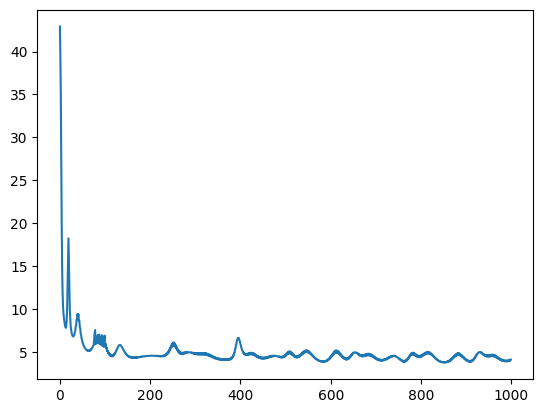

In [ ]:
plt.plot(np.array(E))


In [ ]:
plt.plot(E[0])
plt.plot(E[0])